# manual-tracking-and-saving.ipynb

This notebook is for manually tracking features in a sequence of images using   the Python package [napari](https://napari.org/). Installation instructions available [here](https://napari.org/#installation).

## Import packages

In [7]:
# Standrad library imports
from pathlib import Path
# Third-party imports
import imageio as iio
import napari
import numpy as np
import pandas as pd
import skimage
# Local imports
import helpers
# Enable autorelaod for local packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Open napari window

In [8]:
viewer = napari.Viewer()

## Load images

11 image(s) loaded.
Image numbers: [220 221 222 223 224 225 226 227 228 229 230]


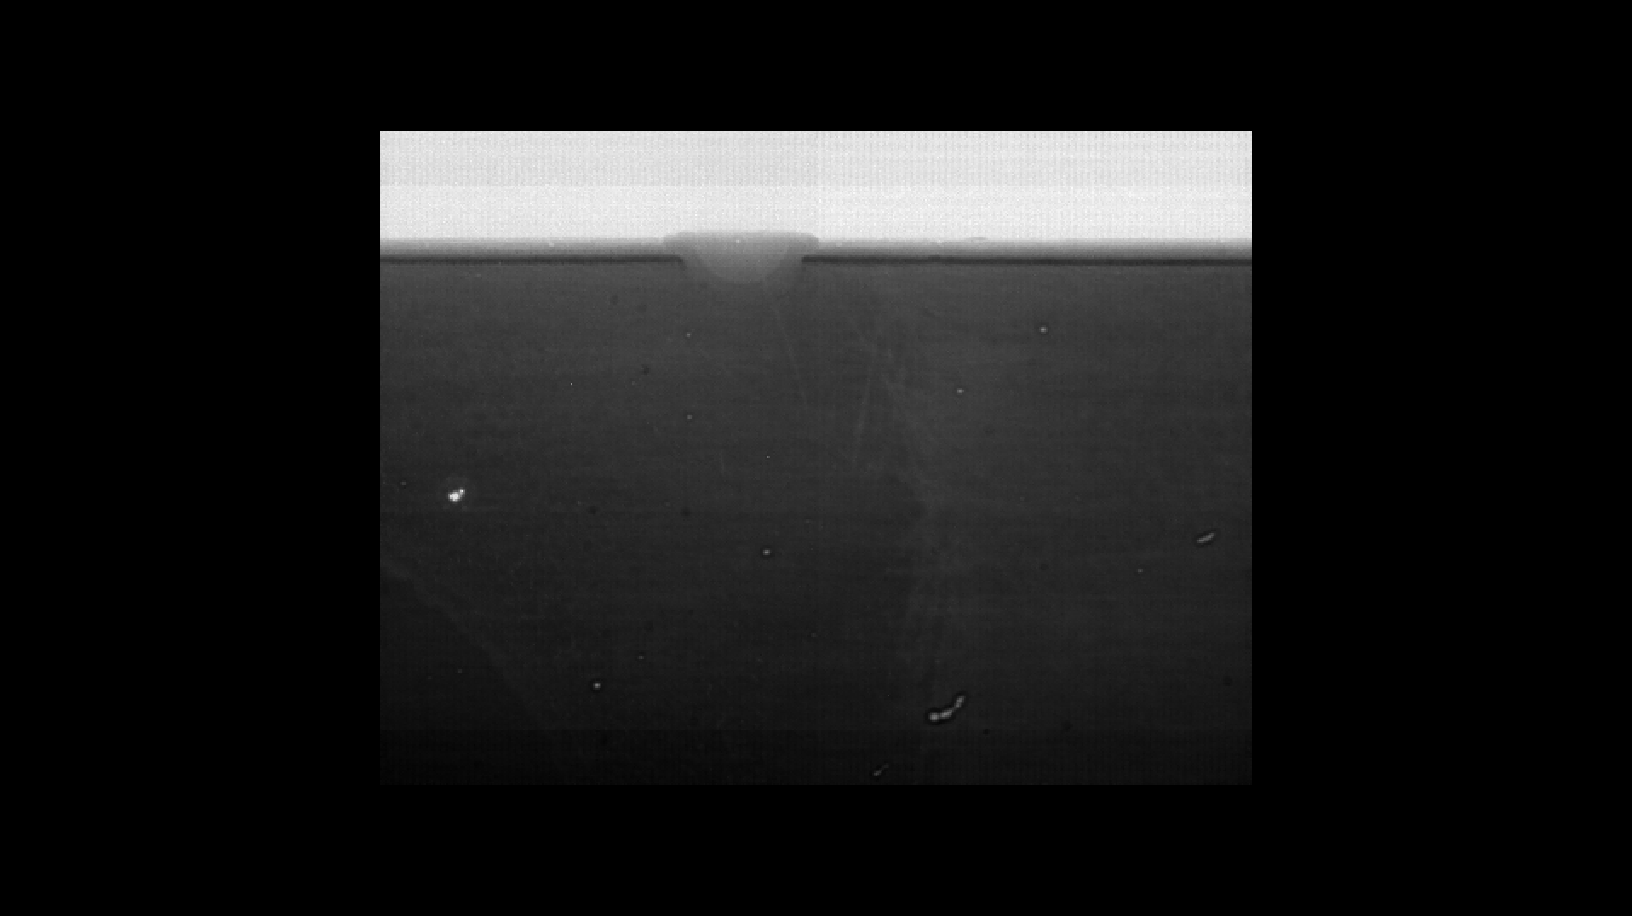

In [9]:
img_nums, imgs = helpers.load_images('data', manual_img_nums=np.arange(220, 231))
print(f'{len(imgs)} image(s) loaded.')
print(f'Image numbers: {img_nums}')
viewer.add_image(imgs)
napari.utils.nbscreenshot(viewer, canvas_only=True)

## Process images

In [12]:
def process_images(
    imgs,
    process='div_by_pre'
):
    if process == 'sub_pre':
        processed_imgs = [
            imgs[n, :, :] - imgs[n - 1, :, :] for n in range(1, imgs.shape[0])
        ]
        processed_imgs.insert(0, np.zeros_like(processed_imgs[0]))
    elif process == 'sub_first':
        processed_imgs = [
            imgs[n, :, :] - imgs[0, :, :] for n in range(1, imgs.shape[0])
        ]
        processed_imgs.insert(0, np.zeros_like(processed_imgs[0]))
    elif process == 'div_by_pre':
        processed_imgs = [
            imgs[n, :, :] / imgs[n - 1, :, :] for n in range(1, imgs.shape[0])
        ]
        processed_imgs.insert(0, np.zeros_like(processed_imgs[0]))
    elif process == 'div_by_first':
        processed_imgs = [
            imgs[n, :, :] / imgs[0, :, :] for n in range(1, imgs.shape[0])
        ]
        processed_imgs.insert(0, np.zeros_like(processed_imgs[0]))
    else:
        raise ValueError(f"Processing routine {process} not recognized; process must be 'sub_pre', 'sub_first', 'div_by_pre', or 'div_by_first'.")
    processed_imgs = np.stack(processed_imgs)
    return processed_imgs

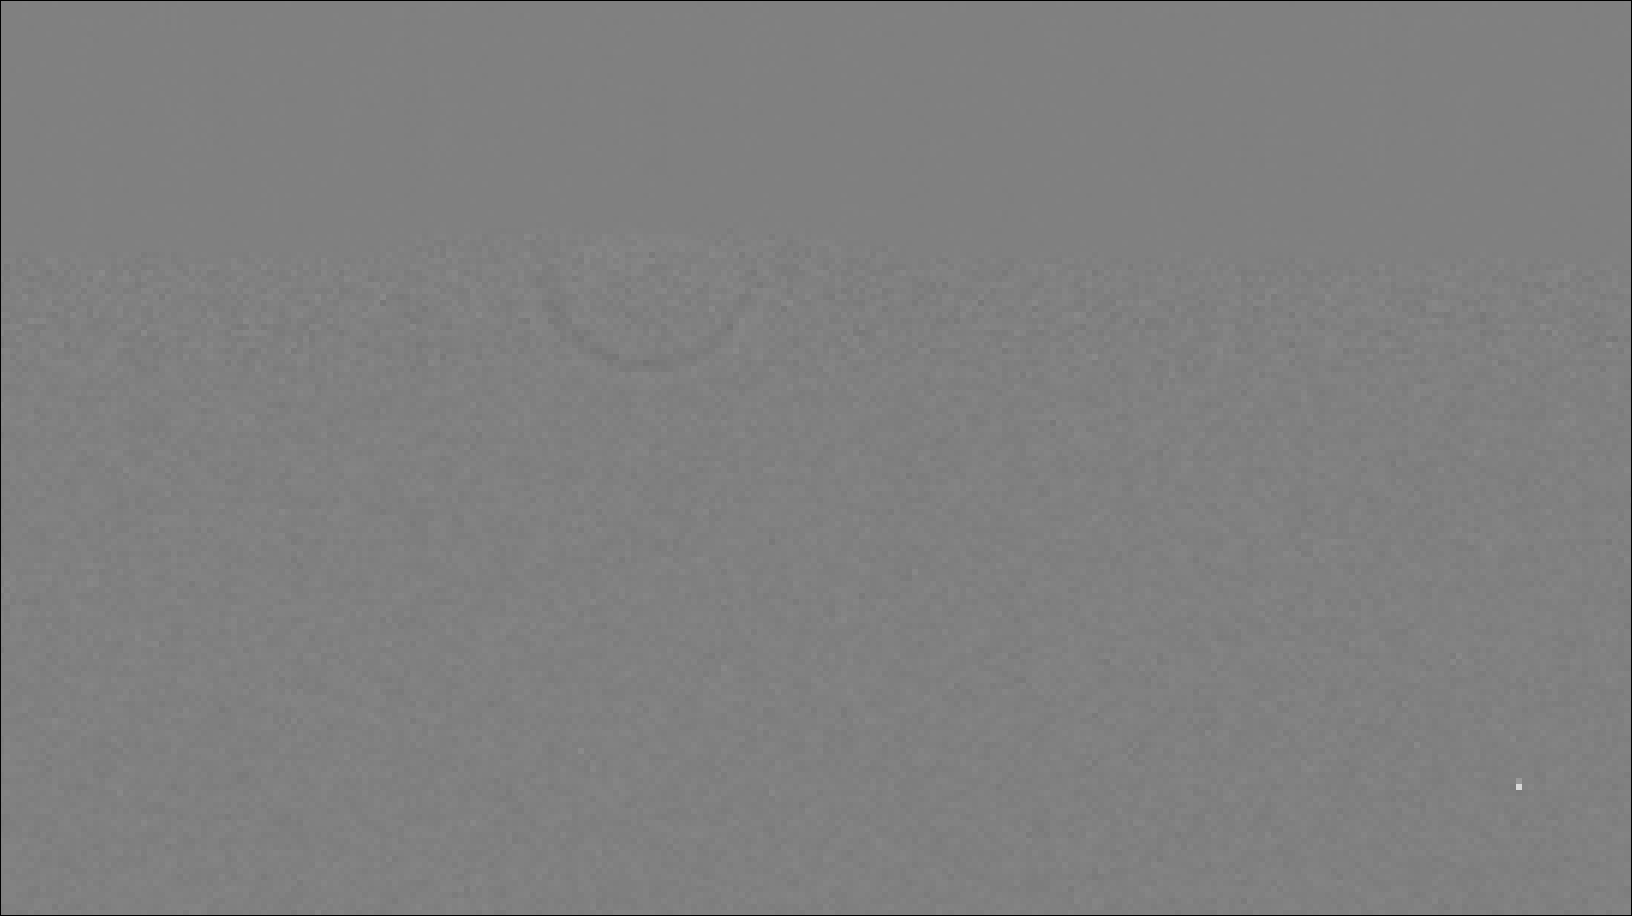

In [16]:
pre_subbed = process_images(imgs, process='sub_pre')
viewer.add_image(pre_subbed)
napari.utils.nbscreenshot(viewer, canvas_only=True)

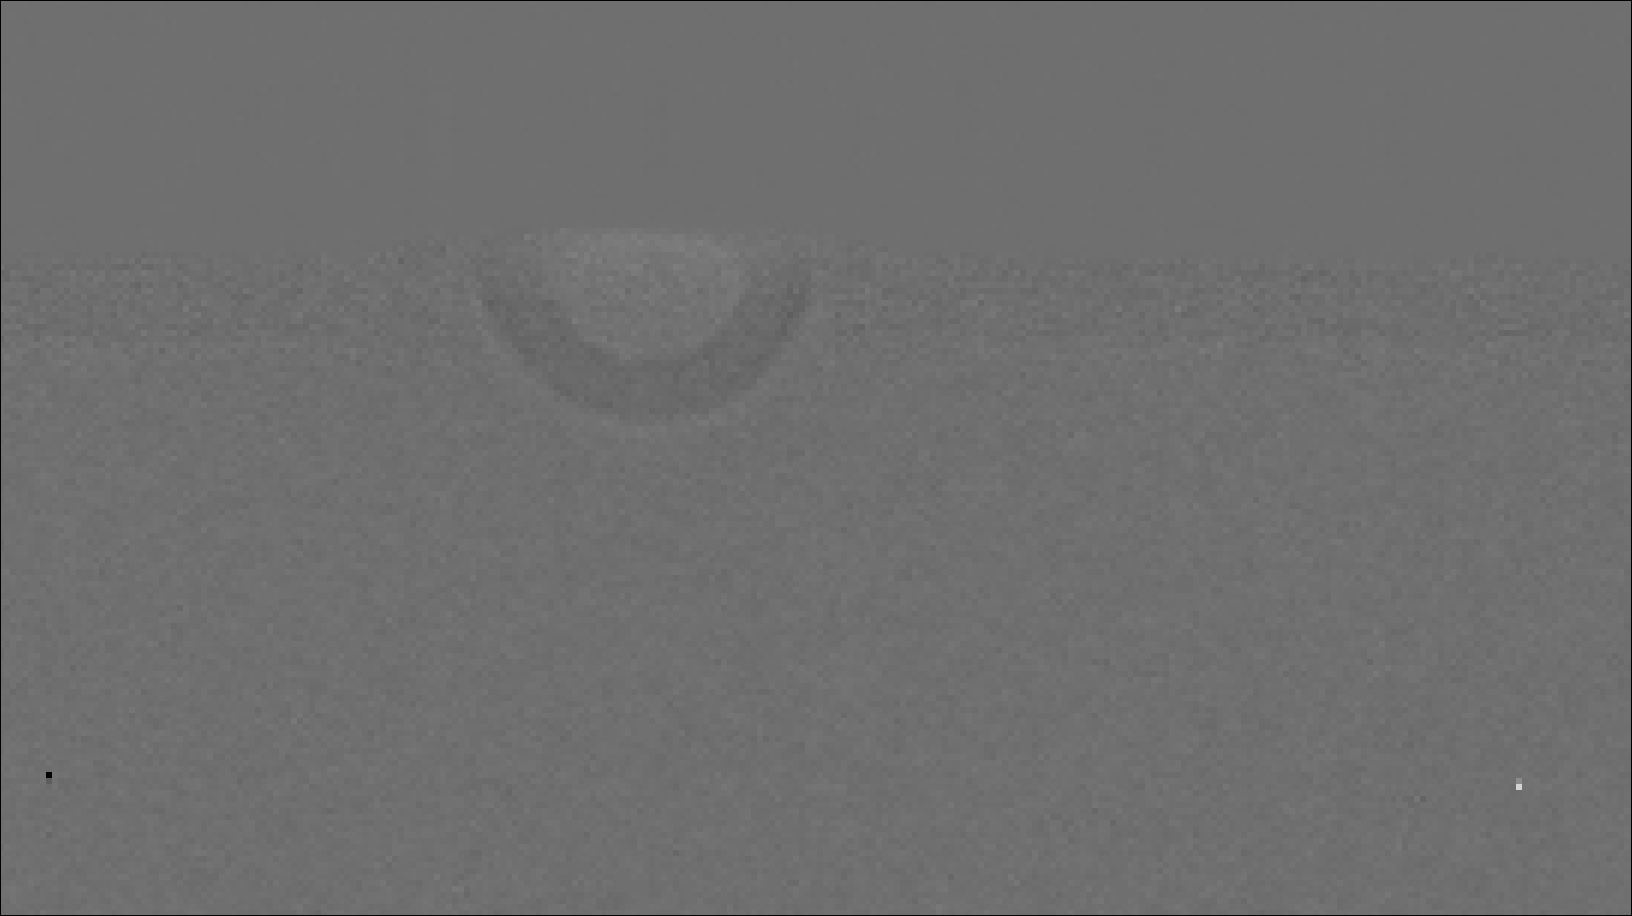

In [17]:
first_subbed = process_images(imgs, process='sub_first')
viewer.add_image(first_subbed)
napari.utils.nbscreenshot(viewer, canvas_only=True)

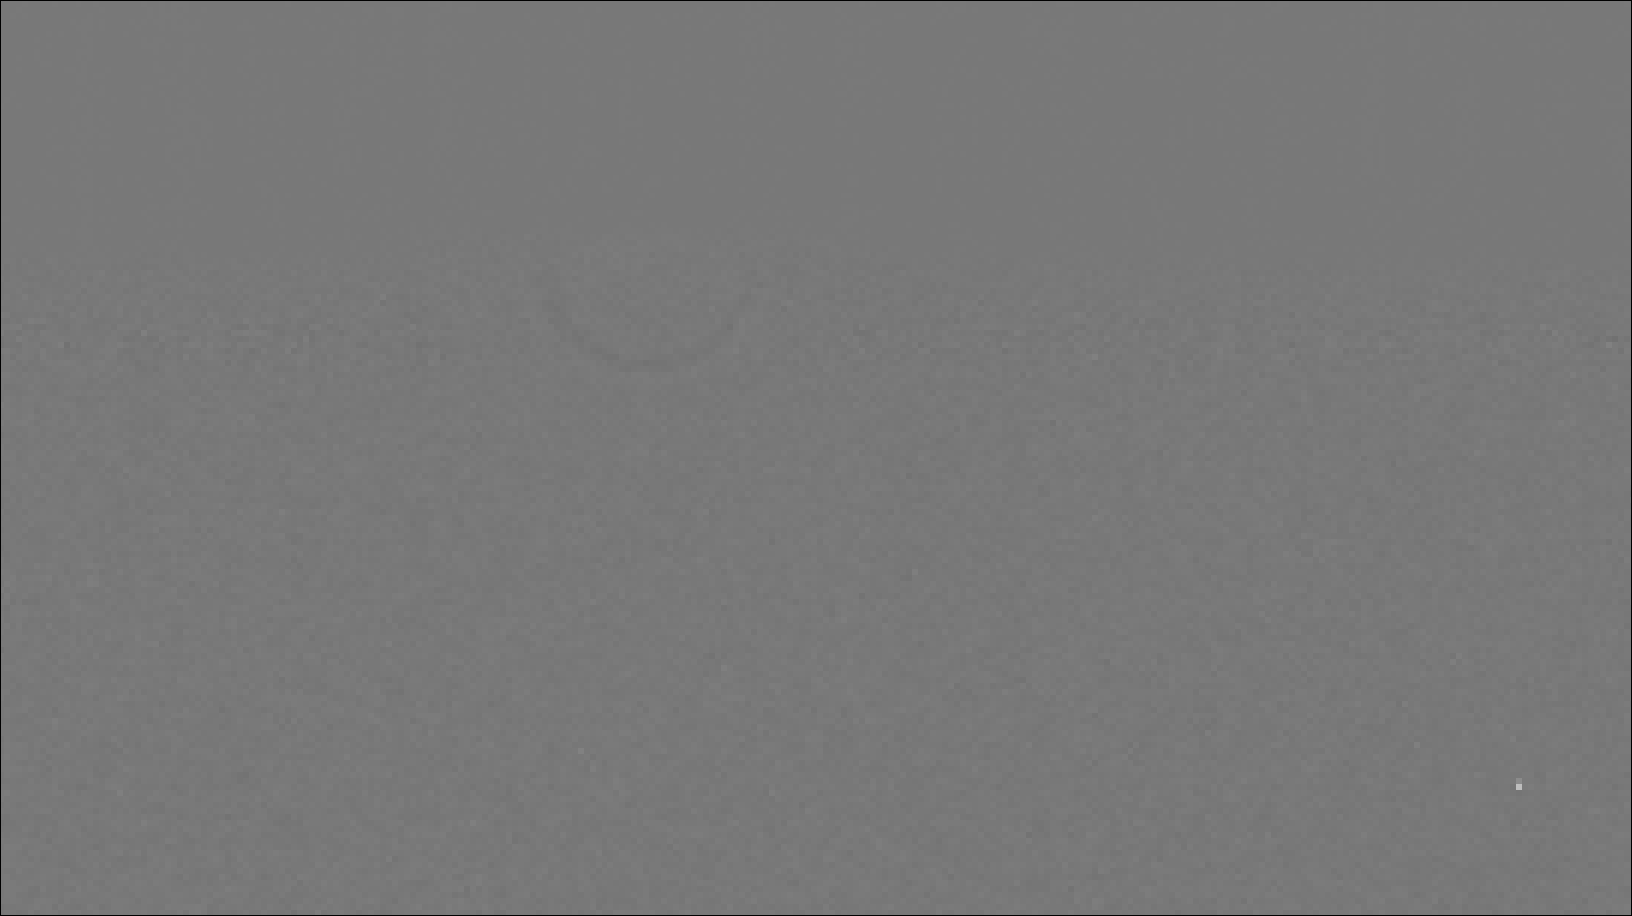

In [18]:
divided_by_pre = process_images(imgs, process='div_by_pre')
viewer.add_image(divided_by_pre)
napari.utils.nbscreenshot(viewer, canvas_only=True)

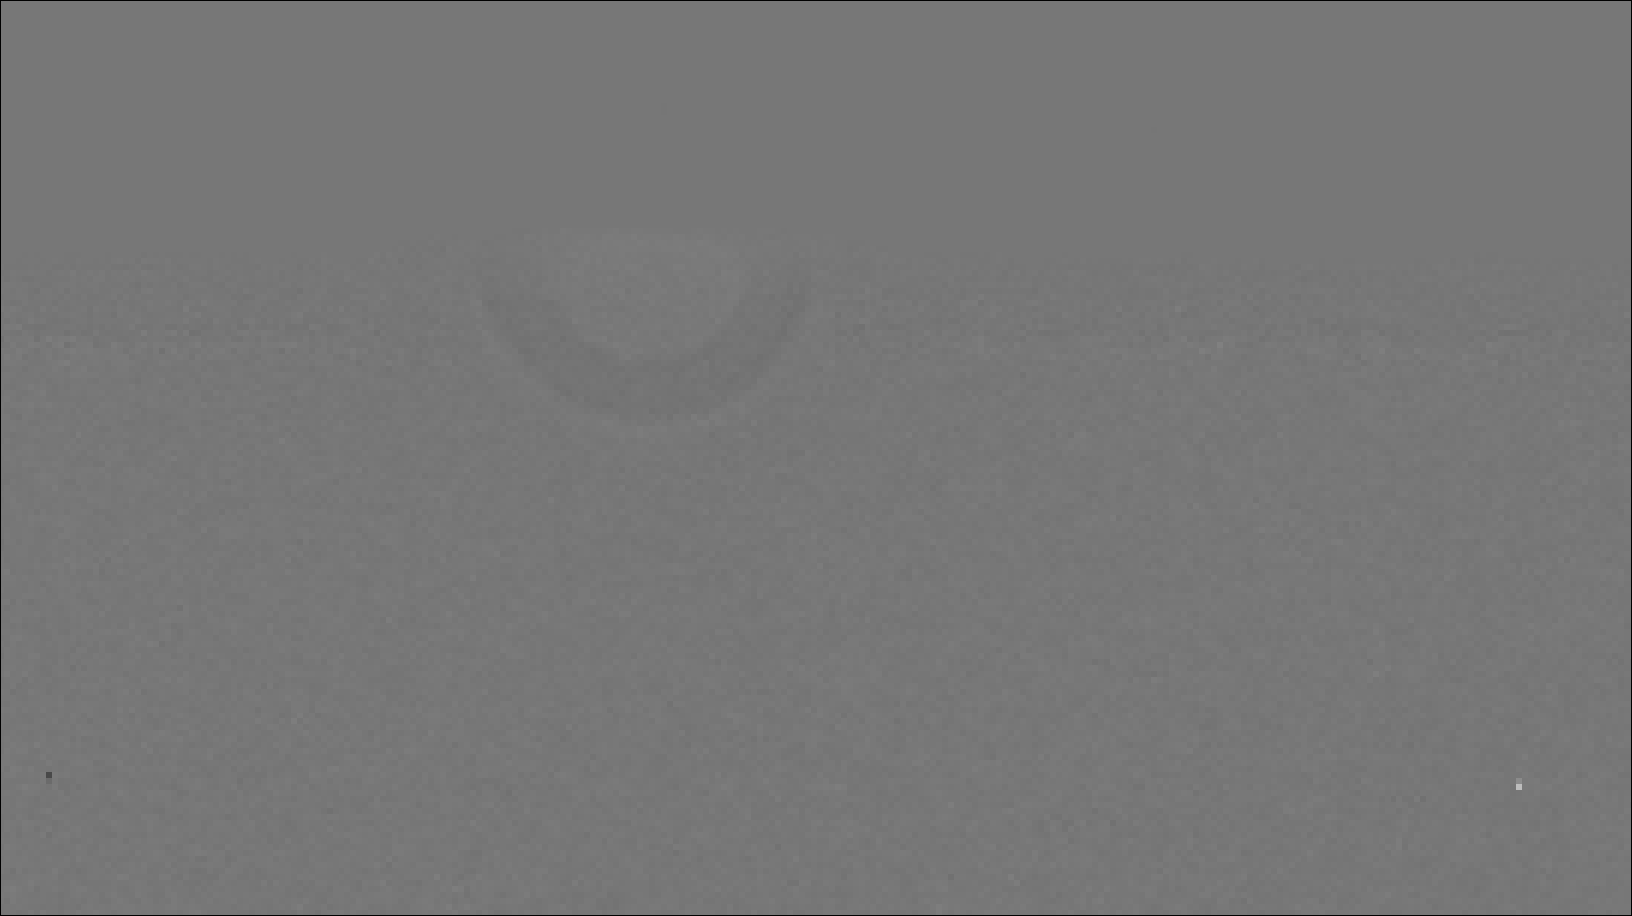

In [19]:
divided_by_first = process_images(imgs, process='div_by_first')
viewer.add_image(divided_by_first)
napari.utils.nbscreenshot(viewer, canvas_only=True)